# **EDA**

## Distribution of Books in Market based on Genre

In [1]:
!pip install vaderSentiment
!pip install wordcloud
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [7]:
df = pd.read_csv('../Datasets/cleaned_data/cleaned_data.csv')

# Step 2: Define labels for top 10 genres
labels = [
    'Fiction', 'Juvenile Fiction', 'Biography & Autobiography', 'Religion',
    'History', 'Business & Economics', 'Computers', 'Cooking',
    'Social Science', 'Family & Relationships'
]

data = df.sample(15000)

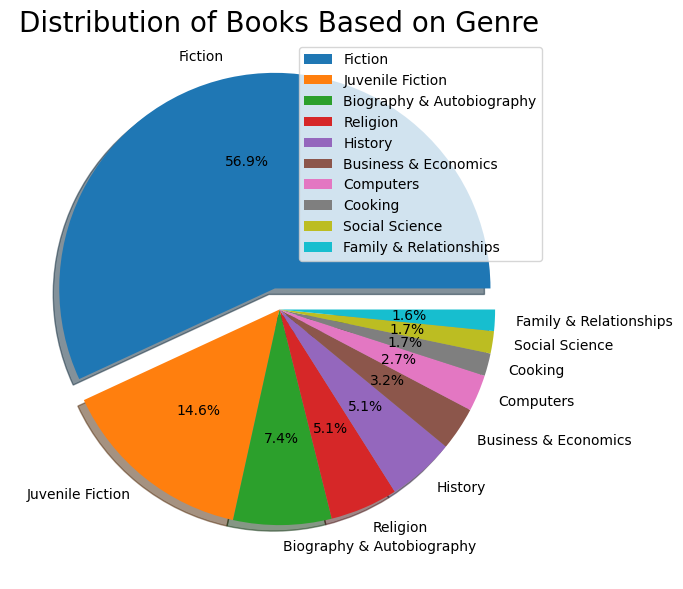

In [8]:
plt.figure(figsize=(7,7))
labels=['Fiction','Juvenile Fiction','Biography & Autobiography','Religion','History','Business & Economics','Computers','Cooking','Social Science','Family & Relationships']
plt.pie(data['categories'].value_counts().head(10),explode=(0.1,0,0,0,0,0,0,0,0,0), labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Books Based on Genre', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

## Most frequent Words in over 3 rated Reviews

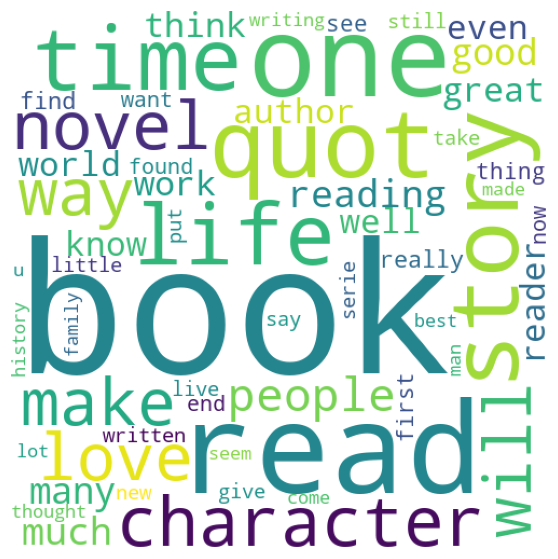

In [9]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')
spam_wc = wc.generate(data[data['review/score'] > 3]['review/text'].str.cat(sep=" "))

plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(spam_wc)

## Most Reviewed Books

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns  

plt.figure(figsize=(12, 6))

cou = data[data['word_count'] > 1707][['Title', 'word_count']].sort_values(by='word_count', ascending=False)

colors = sns.color_palette('husl', n_colors=len(cou))
bars = plt.bar(cou['Title'], cou['word_count'], color=colors)

plt.title('Most Reviewed Books by Word Count', fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('Word Count')
plt.tight_layout()
plt.show()


KeyError: 'word_count'

<Figure size 1200x600 with 0 Axes>

## Highest Rated Books with over 4000 ratings each Book

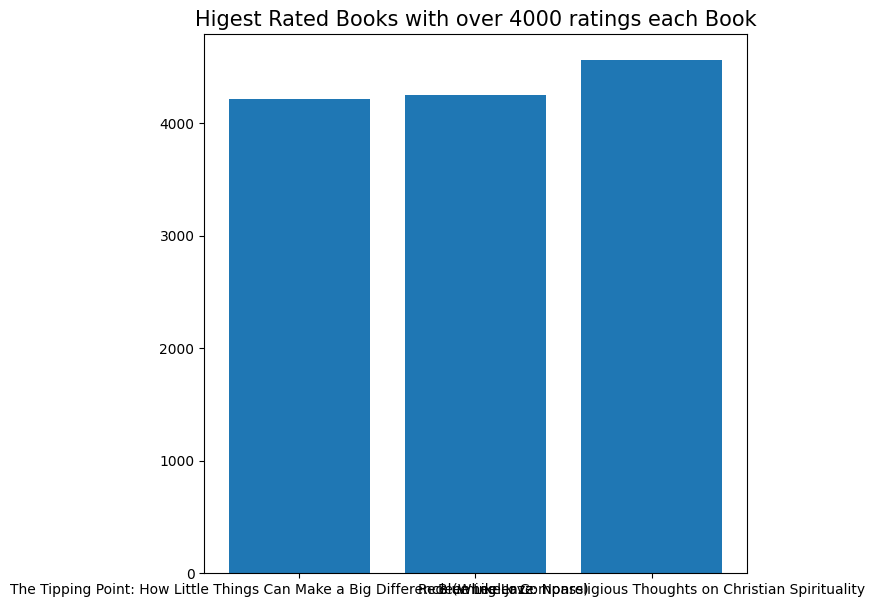

In [11]:
plt.figure(figsize = (7, 7))
rating_counts = data[data['ratingsCount'] > 4000][['Title','ratingsCount']].drop_duplicates()
plt.bar(rating_counts['Title'],rating_counts['ratingsCount'])
plt.title('Higest Rated Books with over 4000 ratings each Book', fontsize = 15)
plt.show()

## In which Genres readers give Positive and Negative Ratings

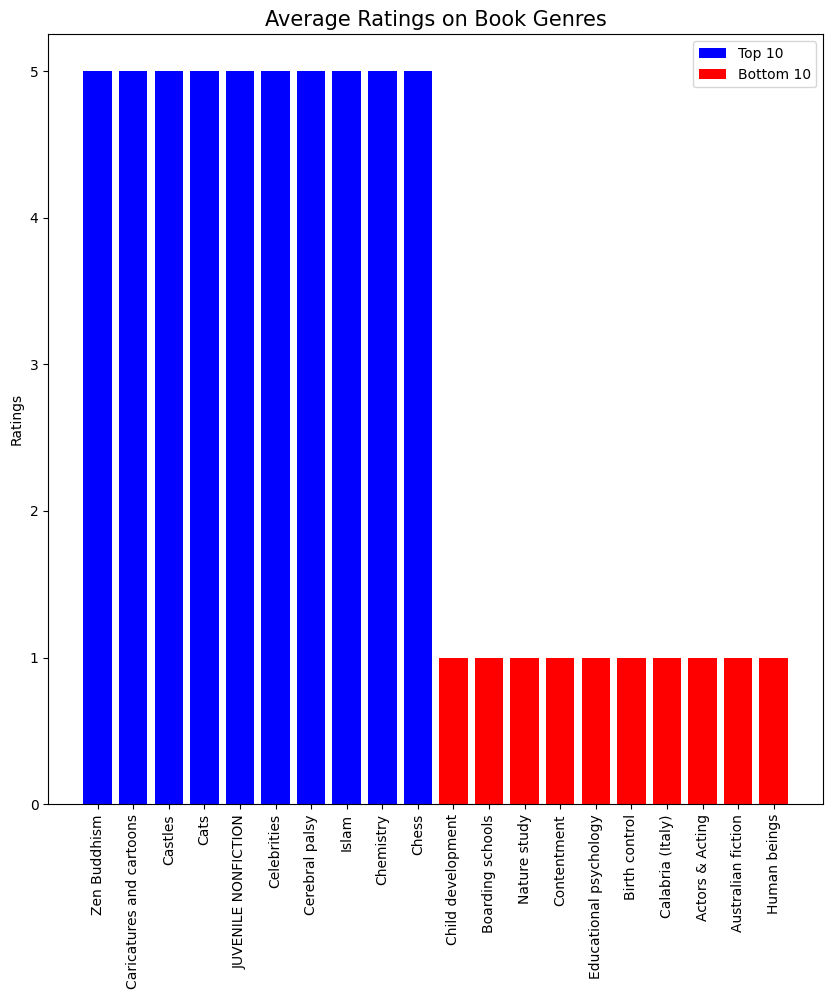

In [12]:
# Convert 'review/score' column to numeric (if applicable)
data['review/score'] = pd.to_numeric(data['review/score'], errors='coerce')

# Filter out non-numeric values (if any)
numeric_data = data.dropna(subset=['review/score'])

# Group by 'categories' and compute the mean of 'review/score'
avg_cat_rating = numeric_data.groupby('categories')['review/score'].mean().sort_values(ascending=False).head(10)
avg_cat_rating_d = numeric_data.groupby('categories')['review/score'].mean().sort_values().head(10)

# Plot the bar chart for top and bottom categories
plt.figure(figsize=(10, 10))
plt.bar(avg_cat_rating.index, avg_cat_rating, color='blue', label='Top 10')
plt.bar(avg_cat_rating_d.index, avg_cat_rating_d, color='red', label='Bottom 10')
plt.title('Average Ratings on Book Genres', fontsize=15)
plt.xticks(rotation='vertical')
plt.ylabel('Ratings')
plt.legend()
plt.show()

## Top 10 Authors with 5 star Ratings

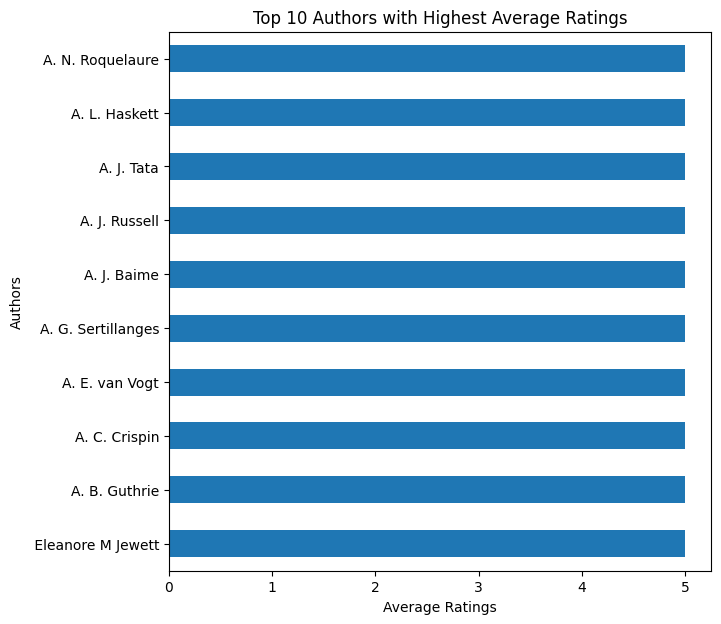

In [13]:
# Convert 'review/score' column to numeric, coercing errors to NaN
data['review/score'] = pd.to_numeric(data['review/score'], errors='coerce')

# Group by 'authors', compute the mean of 'review/score', and plot the top 10 authors
top_authors = data.groupby('authors')['review/score'].mean().nlargest(10)
top_authors.plot(kind='barh', figsize=(7, 7))
plt.title('Top 10 Authors with Highest Average Ratings')
plt.xlabel('Average Ratings')
plt.ylabel('Authors')
plt.show()

## Top 10 Authors with 1 star Ratings

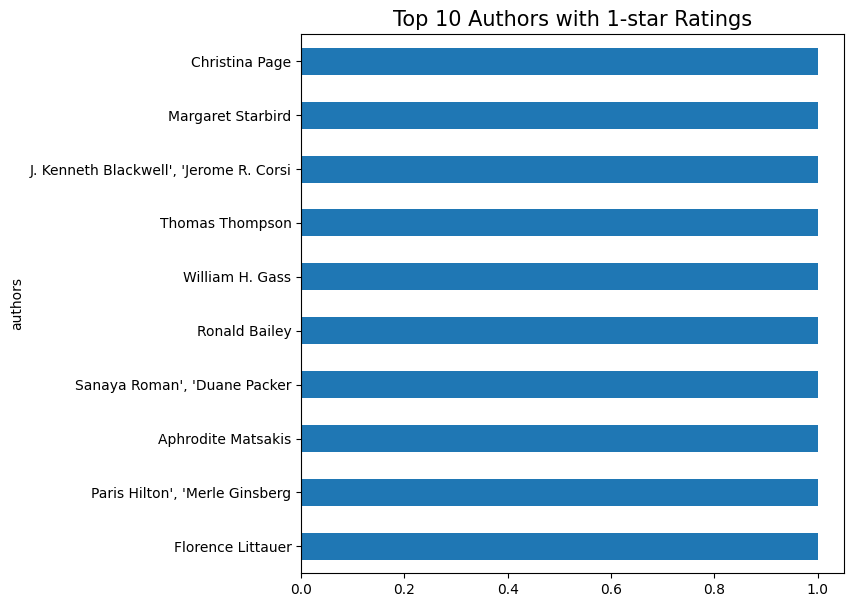

In [14]:
# Grouping the data by authors and calculating the mean review score for each author
average_scores_by_author = data.groupby('authors')['review/score'].mean()

# Sorting the authors based on their average review scores and selecting the bottom 10 (lowest scores)
bottom_10_authors = average_scores_by_author.sort_values(ascending=True).head(10)

# Creating a horizontal bar plot to show the top 10 authors with the lowest average review scores
bottom_10_authors.plot(kind='barh', figsize=(7,7))

# Setting the title for the plot
plt.title('Top 10 Authors with 1-star Ratings', fontsize=15)

# Displaying the plot
plt.show()


## Number of Books written by each Author

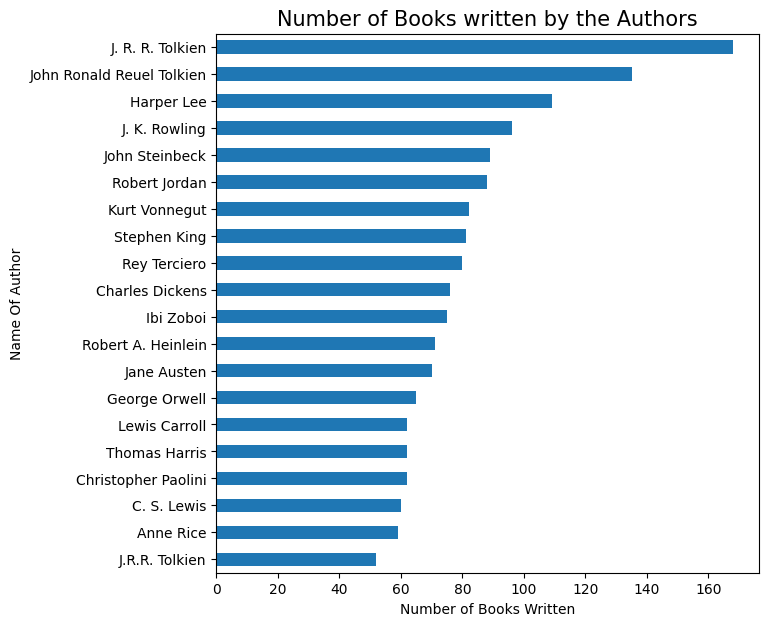

In [15]:
data['authors'].value_counts().head(20).sort_values(ascending = True).plot(kind='barh', figsize=(7,7))
plt.title('Number of Books written by the Authors', fontsize = 15)
plt.ylabel('Name Of Author')
plt.xlabel('Number of Books Written')
plt.show()